# Introduction

# Main imports

In [2]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from tqdm import tqdm
from collections import defaultdict
import numpy as np


pd.options.display.max_columns = 200
pd.options.display.max_rows = 5000

# Load DataFrame

In [3]:
path = 'mxmh_survey_results.csv'

df = pd.read_csv(path)

# Let's dive into this DataFrame

In [4]:
print(df.shape)

(736, 33)


We have a Dataframe with **736** rows and **33**columns

In [5]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [6]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [7]:
df.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


Let's have an overview of the values inside ours rows

In [15]:
for i in df:
    if i == 'Timestamp':
        continue
    print("->>>>",df[i].value_counts(), '\n\n')

->>>> Age
18.0    85
19.0    61
17.0    59
21.0    52
16.0    44
20.0    40
22.0    39
23.0    37
26.0    22
25.0    22
15.0    21
24.0    20
27.0    18
14.0    17
32.0    16
28.0    13
29.0    13
31.0    13
30.0    11
33.0     8
13.0     8
34.0     8
35.0     7
36.0     7
42.0     6
60.0     6
38.0     6
49.0     5
37.0     5
40.0     5
56.0     5
43.0     4
41.0     4
64.0     3
63.0     3
44.0     3
53.0     3
58.0     3
12.0     3
57.0     3
67.0     3
61.0     2
48.0     2
54.0     2
59.0     2
72.0     1
69.0     1
10.0     1
39.0     1
73.0     1
70.0     1
55.0     1
71.0     1
74.0     1
51.0     1
65.0     1
80.0     1
50.0     1
68.0     1
46.0     1
89.0     1
Name: count, dtype: int64 


->>>> Primary streaming service
Spotify                              458
YouTube Music                         94
I do not use a streaming service.     71
Apple Music                           51
Other streaming service               50
Pandora                               11
Name: count,

### Nan values

In [21]:
for i in df:
    print(i, f'{(df[i].isnull().sum() / len(df.index)) * 100}% values missing')

Timestamp 0.0% values missing
Age 0.1358695652173913% values missing
Primary streaming service 0.1358695652173913% values missing
Hours per day 0.0% values missing
While working 0.4076086956521739% values missing
Instrumentalist 0.5434782608695652% values missing
Composer 0.1358695652173913% values missing
Fav genre 0.0% values missing
Exploratory 0.0% values missing
Foreign languages 0.5434782608695652% values missing
BPM 14.538043478260871% values missing
Frequency [Classical] 0.0% values missing
Frequency [Country] 0.0% values missing
Frequency [EDM] 0.0% values missing
Frequency [Folk] 0.0% values missing
Frequency [Gospel] 0.0% values missing
Frequency [Hip hop] 0.0% values missing
Frequency [Jazz] 0.0% values missing
Frequency [K pop] 0.0% values missing
Frequency [Latin] 0.0% values missing
Frequency [Lofi] 0.0% values missing
Frequency [Metal] 0.0% values missing
Frequency [Pop] 0.0% values missing
Frequency [R&B] 0.0% values missing
Frequency [Rap] 0.0% values missing
Frequenc

### Vizualisation

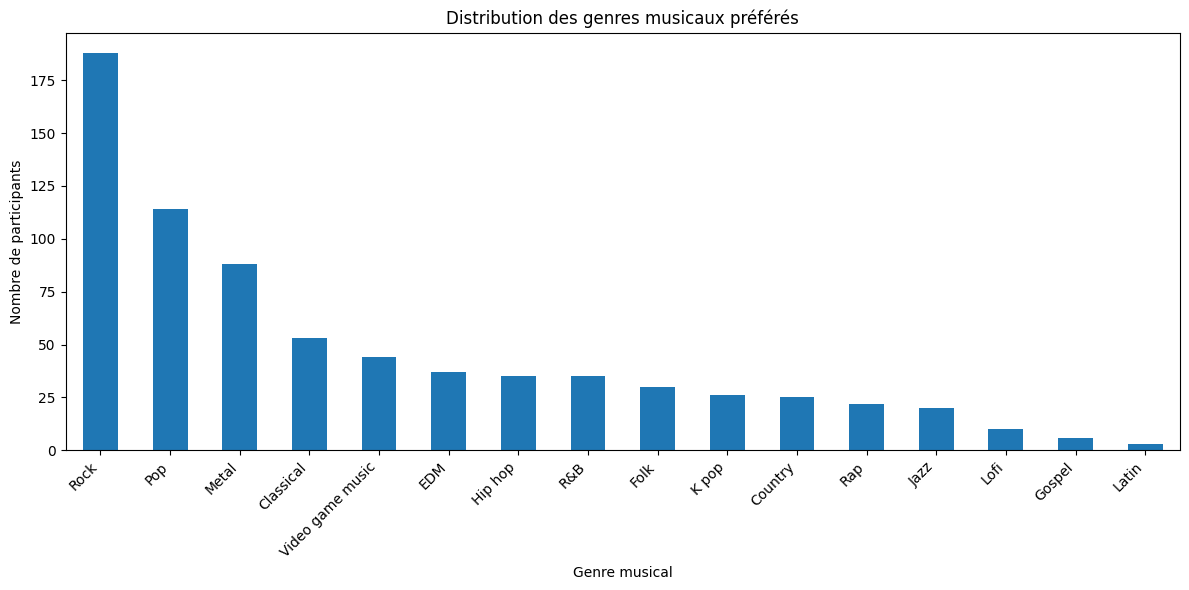

In [42]:
genre_counts = df['Fav genre'].value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Distribution des genres musicaux préférés')
plt.xlabel('Genre musical')
plt.ylabel('Nombre de participants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Mean

The mean of anxiety of people considering themselves as anxious

In [24]:
anxiety_level = 5

anxiety_personne = df[df['Anxiety'] >= anxiety_level]

anxiety_personne['Anxiety'].mean()

np.float64(7.452286282306163)

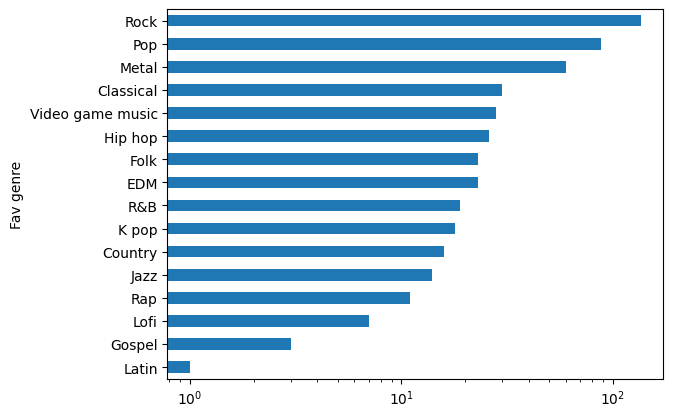

In [41]:
rah = anxiety_personne["Fav genre"].value_counts(sort=True, ascending=True)
ax = rah.plot(kind='barh')
ax.set_xscale('log')
